# Vienna Insurance Group (VIG)- Wiener Städtische Versicherung Trustpilot Reviews
It is important to note here that VIG Holding is the 'umbrella organization of the Vienna Insurance Group' and that 
VIG is made up of various other companies: VIG, Donau Versicherung, Wiener Städtische Versicherung. Therefore, I will be taking reviews from multiple 'seemingly different' companies, however, they are all components of the VIG- which is UNIQA's top competitor to date. This notebook is all about Wiener Städtische Versicherung.

In [1]:
#importing libraries
from scrapethat import *
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

Testing with the 1st page of the trust pilot website

In [26]:
site = read_cloud('https://at.trustpilot.com/review/www.wienerstaedtische.at')
paragraphs = site.find_all('p')

In [24]:
page1 = [paragraph.get_text() for paragraph in paragraphs[15:54] if 'Datum' not in paragraph.get_text() and 'Profil nicht' not in paragraph.get_text() and 'Vielen Dank' not in paragraph.get_text() and 'Sehr geehrter' not in paragraph.get_text() and 'Antwort von' not in paragraph.get_text()]

Defining function to get all pages from trustpilot

In [41]:
def get_reviews(url):
    try:
        if url == 'https://at.trustpilot.com/review/www.wienerstaedtische.at':
            site = read_cloud(url)
            paragraphs = site.find_all('p')
            reviews = [paragraph.get_text() for paragraph in paragraphs[15:54] if 'Datum' not in paragraph.get_text() and 'Profil nicht' not in paragraph.get_text() and 'Vielen Dank' not in paragraph.get_text() and 'Sehr geehrter' not in paragraph.get_text() and 'Antwort von' not in paragraph.get_text()]
        else:
            site = read_cloud(url)
            paragraphs = site.find_all('p')
            reviews = [paragraph.get_text() for paragraph in paragraphs[15:54] if 'Datum' not in paragraph.get_text() and 'Profil nicht' not in paragraph.get_text() and 'Vielen Dank' not in paragraph.get_text() and 'Sehr geehrter' not in paragraph.get_text() and 'Antwort von' not in paragraph.get_text()]
            reviews = reviews[:2]
        return reviews
    except:
        return None

In [42]:
#gathering all trust pilot urls
trust_pilot_urls = [f'https://at.trustpilot.com/review/www.wienerstaedtische.at?page={i}' for i in range(2,3)]
trust_pilot_urls.append('https://at.trustpilot.com/review/www.wienerstaedtische.at')

In [43]:
trust_pilot_urls

['https://at.trustpilot.com/review/www.wienerstaedtische.at?page=2',
 'https://at.trustpilot.com/review/www.wienerstaedtische.at']

In [46]:
#testing function with page 1
get_reviews('https://at.trustpilot.com/review/www.wienerstaedtische.at')
print()

In [47]:
#getting all reviews
all_reviews = list(map(lambda url: get_reviews(url), trust_pilot_urls))
all_reviews

[['ewige wartezeiten man muss quasi um Rückruf betteln Die Mitarbeiter schlafen',
  'Keine Rückmeldungen auf Mais, lange Wartezeiten auf Auszahlungen, sehr enttäuschend!'],
 ['Verarschen einen von vorn bis hinten, lassen einen nicht kündigen und finden immer irgendwelche Ausreden und Sachen die angeblich nicht passen. Telefonische Serviceline auch inkompetent, die meinte auch eine Kündigung ist nicht möglich.. geholfen wurde da nicht.. als sich der Vertrag dann um ein Jahr verlängerte, war es dann doch möglich zu kündigen.. damit sie ein Jahr länger gezahlt bekommen.."Ihre Sorgen möchten wir haben" - Diese Versicherung ist meine einzige Sorge..',
  'Sehr schlimm und grenzt an Betrug mit ihren vertägen wo die Angestellten nur auf gute Porvisionen Arbeiten das sie gewinne machen.Und nur zum vorteil der Versicherung der Wiener Staedtischen.Bei mir war es eine Begräbniskostenversicherung für die Begräbniss kosten.Habe weniger bekommen was ich überhaubt eingezahlt habe.Hätte ich mir mein ge

### Now, want to try pandas df to draw multiple pieces of info from the reviews

In [49]:
site = read_cloud('https://at.trustpilot.com/review/www.wienerstaedtische.at')
#username
usernames = site.find_all('span', class_ = 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17')
username_list = [username.get_text() for username in usernames]
#amount of reviews per user on Trustpilot
review_nums = site.find_all('span', class_ = 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l')
all_review_nums = [int(review_num.get_text().split()[0]) for review_num in review_nums][3:]
#country/location of user
countries = site.find_all('span', class_ = '')
all_countries = [cun.get_text() for cun in countries if (len(cun.get_text()) < 4) and (cun.get_text() != '')]
#title/header on review
titles = site.find_all('h2', class_ = 'typography_heading-s__f7029 typography_appearance-default__AAY17')
all_titles = [title.get_text() for title in titles]
#stars given out of 5
stars = site.find_all('img', alt = True)
all_stars = [int(star['alt'].split()[2]) for star in stars if 'Bewertet' in star['alt']]


In [50]:
#function to create a dataframe out of Trustpilot reviews
def get_all_info (site):
    try:
        site = read_cloud(site)
        #username
        usernames = site.find_all('span', class_ = 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17')
        username_list = [username.get_text() for username in usernames]
        #amount of reviews per user on Trustpilot
        review_nums = site.find_all('span', class_ = 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l')
        all_review_nums = [int(review_num.get_text().split()[0]) for review_num in review_nums][3:]
        #country/location of user
        countries = site.find_all('span', class_ = '')
        all_countries = [cun.get_text() for cun in countries if (len(cun.get_text()) < 4) and (cun.get_text() != '')]
        #title/header on review
        titles = site.find_all('h2', class_ = 'typography_heading-s__f7029 typography_appearance-default__AAY17')
        all_titles = [title.get_text() for title in titles]
        #stars given out of 5
        stars = site.find_all('img', alt = True)
        all_stars = [int(star['alt'].split()[2]) for star in stars if 'Bewertet' in star['alt']]
        #DataFrame
        data = {
            'username':username_list,
            '#_of_reviews_per_user': all_review_nums,
            'country': all_countries,
            'review_title':all_titles,
            'stars':all_stars}
#             'date_experienced':date_experienced_dt_objects,
#             'date_experienced_weekdays':date_experienced_weekdays
        df = pd.DataFrame(data)
        return df
    except:
        return None

In [51]:
#all review info
dataframes = [get_all_info(url) for url in trust_pilot_urls]

In [52]:
get_all_info('https://at.trustpilot.com/review/www.wienerstaedtische.at')

,username,#_of_reviews_per_user,country,review_title,stars
0,Mario Lacky,2,AT,Nie wieder..,1
1,Roman Berger,3,AT,Sehr schlimm und grenzt an betrug,1
2,Velina Atanasova,1,AT,NIE WIEDER,1
3,Moonlight,2,AT,Meine Bewertung/ Meine Meinung,5
4,Matthias Hahn,1,AT,Ich bin schon lange unzufrieden,1
5,Gabi Bauer,1,AT,6 Monate auf Rückzahlung gewartet,1
6,Mirko Stani,1,AT,"Drei Jahre Kunde, wurde 50% teurer",1
7,Uli,1,AT,Unfassbar schlechtes Kundenservice!,1
8,Hannes,2,AT,Außer Späßen nichts gewesen.,1
9,Stefan Hensel,1,AT,nach Kündigung einer…,1


In [53]:
#df of all reviews
all_info = pd.concat(dataframes).reset_index()
all_info

,index,username,#_of_reviews_per_user,country,review_title,stars
0,0,Ri Chi,4,AT,ewige wartezeiten man muss quasi um…,1
1,1,Daniela Landauer,2,AT,Keine Rückmeldungen auf Mais,1
2,0,Mario Lacky,2,AT,Nie wieder..,1
3,1,Roman Berger,3,AT,Sehr schlimm und grenzt an betrug,1
4,2,Velina Atanasova,1,AT,NIE WIEDER,1
5,3,Moonlight,2,AT,Meine Bewertung/ Meine Meinung,5
6,4,Matthias Hahn,1,AT,Ich bin schon lange unzufrieden,1
7,5,Gabi Bauer,1,AT,6 Monate auf Rückzahlung gewartet,1
8,6,Mirko Stani,1,AT,"Drei Jahre Kunde, wurde 50% teurer",1
9,7,Uli,1,AT,Unfassbar schlechtes Kundenservice!,1


In [54]:
all_info.country.value_counts()

country
AT    20
UA     1
JM     1
Name: count, dtype: int64

In [56]:
all_info.stars.mean()
#1.2 as star average for Wienerstädtische (VIG) on Trustpilot

1.2272727272727273

## ChatGPT Sentiment Analysis
Trying ChatGPT sentiment analysis as it worked better than the machine learning model I created.

In [58]:
chatgpt_vig_wienersta= pd.read_csv('VIG_wienerstae_chatgpt_sentiment - Sheet1.csv')
chatgpt_vig_wienersta

,Review,Sentiment_Score,Sentiment
0,"Eternal waiting times, one practically has to ...",-0.70,Negative
1,"No feedback on emails, long waiting times for ...",-0.80,Negative
2,"They scam you from start to finish, don't let ...",-0.90,Negative
3,Very bad and bordering on fraud with their con...,-0.95,Negative
4,"Unfriendly, rude, and arrogant. If possible, I...",-0.85,Negative
5,I would say it depends on the advisor you choo...,0.70,Positive
6,I have been dissatisfied for a long time. In 7...,-0.80,Negative
7,I bought a new car and got a better insurance ...,-0.90,Negative
8,"The slogan shouldn't be ""we want your worries""...",-0.90,Negative
9,"Internal communication doesn't work at all, ha...",-0.80,Negative


In [60]:
chatgpt_vig_wienersta.Sentiment_Score.mean()

-0.7204545454545455

The sentiment score seems to be overall very negative with average sentiment score of -0.72.

In [61]:
chatgpt_vig_wienersta.Sentiment.value_counts()

Sentiment
Negative    20
Positive     2
Name: count, dtype: int64

There seems to be very negative sentiment on Trustpilot regarding Wienerstädtische Versicherung. 20 Negative reviews and 2 Positive with no neutral reviews. However, it is also important to note that this is only a sample size of 22 reviews, and therefore, it is likely not enough reviews to draw a solid/robust conclusion.

I also asked ChatGPT to count the instances of each word (not including English stopwords):
- `insurance`: 14 times
- `service`: 9 times
- `money`: 7 times
- `customer`: 6 times
- `time`: 6 times
- `cancel`: 5 times
- `claim`: 5 times
- `email`: 5 times
- `response`: 5 times
- `bad`: 5 times

From this analysis, I see various possible problem areas. For example, service and customer and ery frequently said; one might hypothesize that customer service could be a large problem for this company, similarly to UNIQA. I also see 'email' and 'response' rather frequently. This again could relate to customer service and the overall process of a claim- perhaps the company is bad at responding/sending emails to the customers in a timely manner, etc.

## Combining Donau Versicherung with Wienerstädtische Versicherung (VIG companies) for larger sample size//Comapison with UNIQA Trustpilot Reviews

In [70]:
donau = pd.read_csv('chatgpt_vigDONAU_sentimentanalysis - .csv')
donau.rename(columns = {'Sentiment Score':'Sentiment_Score'}, inplace = True)
vig_table_total = pd.concat([donau, chatgpt_vig_wienersta], ignore_index = True)
vig_table_total

,Review,Sentiment_Score,Sentiment,Review
0,Visa accepts Donau Versicherung as travel insu...,-0.50,Negative,NaN
1,Donau Versicherung was my home and liability i...,-0.80,Negative,NaN
2,No more Donau Versicherung - Despite the alleg...,-0.90,Negative,NaN
3,I switched my household insurance to my new e-...,-0.70,Negative,NaN
4,"Called twice for a simple request, but the cus...",-0.80,Negative,NaN
5,Just spoke to the intermediary on the phone - ...,-0.70,Negative,NaN
6,Experiences with Donau Haus and especially leg...,-0.90,Negative,NaN
7,Now I have received a letter from Donau-Versic...,-0.50,Negative,NaN
8,Warning! Only take out health insurance with D...,-0.90,Negative,NaN
9,"Unfortunately, I can't confirm the positive ex...",-0.80,Negative,NaN


Despite the odd formatting, it doesn't matter because the sentiment score and sentiment columns are correct

In [80]:
vig_table_total.Sentiment_Score.mean()
#overall pretty negative with -0.50. 

-0.5041666666666668

This is overall a very negative sentiment. However in comparison to UNIQA's sentiment score, it is slightly more positive. UNIQA's sentiment score was: -0.653 (more negative). It is also important to note however that UNIQA had a much larger sample size (126 reviews), whereas VIG's was much lower (60 reviews). *However, something also important to note is that because the sentiment does not vary widely in its sentiment variability, this sample size has proved to be an ok size.

In [81]:
vig_table_total.Sentiment.value_counts()

Sentiment
Negative    48
Positive    12
Name: count, dtype: int64

VIG's ratio of positive to negative reviews is 1:4, while UNIQA's is 5:49. Manipulating the numbers a bit, if we multiply VIG's ratio by a factor of 11 (to set the total number of reviews almost equal), we get 11:44 which is much better than UNIQA's ratio of positive to negative reviews.

# Robustness Checks

## Qualitative Analysis

https://www.statista.com/statistics/901410/largest-insurance-groups-in-austria-by-market-share/

https://www.advantageaustria.org/ae/zentral/branchen/banken-und-versicherungen/zahlen-und-fakten/zahlen-und-fakten.en.html


According to statista.com (in 2019), the largest insurance group by market share in Austria is VIG, closely followed by UNIQA. Furthermore, according to advantageaustria.org, Austria's top insurance company (by volume of earned premiums- 2022) was Vienna Insurance Group AG Wiener Versicherung Gruppe, having earned almost twice the premiums of UNIQA. This being said, one reason that UNIQA might receive harsher and more negative critiques than VIG could be simply because UNIQA is the second top insurance company and customers could be subconciously using competitor comparison. Customers might be comparing their experiences with UNIQA to that of its competitor(s), and might know that VIG is the top insurance company- possibly with a better reputation- and therefore, this attitude be exacerbated in very negative and stressful times when rating the company. 

Even though most of my data comes from Austria, VIG has a larger market with companies in 30 countries, while UNIQA has companies in about 16. This might also add to the impression of differing reputations between the 2 companies.

## Statistical Tests

I want to see if the sentiment score means of UNIQA and VIG are the same or not. (Want to know if these groups are similar enough- and therefore that my analysis has significance and robustness).

Null hypothesis: UNIQA sentiment scores = VIG sentiment scores (similar sentiment scores)

Alt hypothesis: UNIQA sentiment scores != VIG sentiment scores (not similar sentiment scores)

In [86]:
#reading in UNIQA data
chatgpt_sen_ana = pd.read_csv('UNIQA Trustpilot Reviews_ChatGPT Sentiment Analysis Table - Sheet1.csv')
chatgpt_sen_ana.rename(columns = {'Sentiment Score':'Sentiment_Score'}, inplace = True)

In [113]:
#importing libraries
import numpy as np
from scipy import stats
import statsmodels.api as sm
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

#VIG sentiment scores
vig_sentiment_scores = list(vig_table_total['Sentiment_Score'])
#UNIQA sentiment scores
uniqa_sentiment_scores = list(chatgpt_sen_ana['Sentiment_Score'])

#two-sided T-test for sentiment scores
t_stat, p_value = stats.ttest_ind(vig_sentiment_scores, uniqa_sentiment_scores, equal_var=True)

### Testing for sentiment score normality (to see if these data sets can compare to one another)

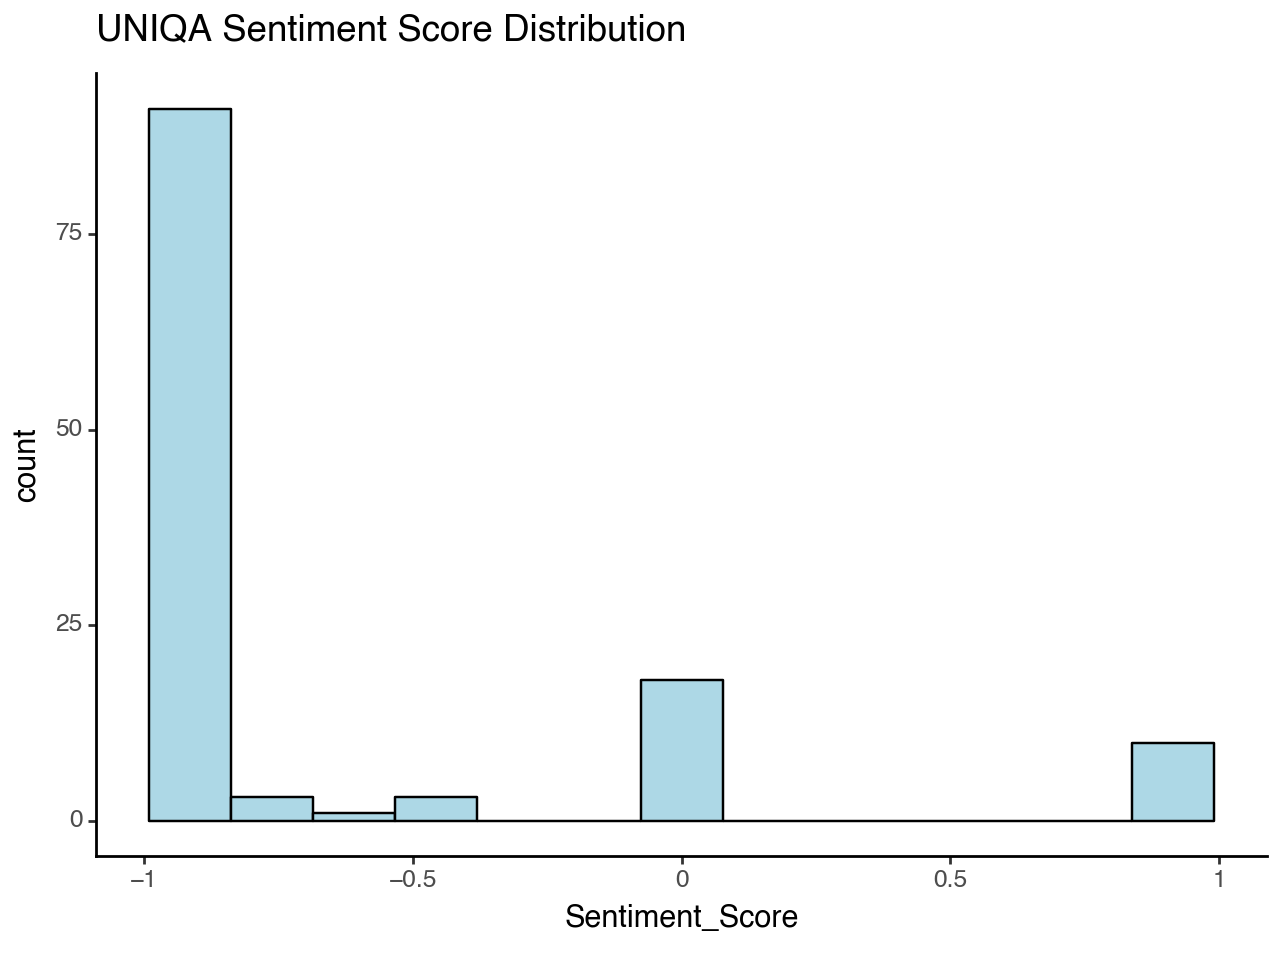

<Figure Size: (640 x 480)>

In [117]:
#Histogram showing distribution of Sentiment Scores for UNIQA (x axis = sentiment scores, y axis = count)
(ggplot(chatgpt_sen_ana, aes(x = 'Sentiment_Score')) + geom_histogram(color = 'black', fill = 'lightblue') 
 + theme_classic() + labs (title = 'UNIQA Sentiment Score Distribution'))

The distribution of sentiment scores for UNIQA is not at all normal- it has a long right tail as the scores are all skewed to the left (negatively skewed).

In [ ]:
#Histogram showing distribution of Sentiment Scores for VIG (x axis = sentiment scores, y axis = count)
(ggplot(vig_table_total, aes(x = 'Sentiment_Score')) + geom_histogram(color = 'red', fill = 'lightblue') 
 + theme_classic() + labs (title = 'UNIQA Sentiment Score Distribution'))

The distribution of sentiment scores for VIG is also not at all normal- it has a long right tail as the scores are all skewed to the left (negatively skewed). However, the most negative sentiment scores as slightly more positive than those of UNIQA's- keeping in mind the very different sample sizes


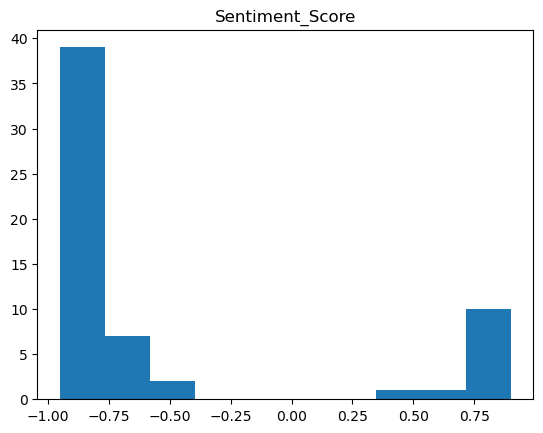

In [98]:
#Histogram showing distribution of Sentiment Scores for VIG (x axis = sentiment scores, y axis = count)
vig_table_total.hist(column='Sentiment_Score', grid = False)
print("The distribution of sentiment scores for VIG is also not at all normal- it has a long right tail as the scores are all skewed to the left (negatively skewed). However, the most negative sentiment scores as slightly more positive than those of UNIQA's- keeping in mind the very different sample sizes")

I wanted to check the insurance company's sentiment scores for normal distributions to be able to conduct a two-sample t-test. I found that both of the distributions were severly non-normal; however, given a sufficient sample size, the samples don't have to be normally distributed. Why? Due to the Central Limit Theorem- if the sample size is sufficient, the sampling mean tends to resemble the normal distribution. Because I have at least 50 observations for each insurance company, I chose to go ahead with my two-sample t-test.

In [101]:
print(f't_stat: {t_stat}')

t_stat: 1.5769862087147986


The t-stat is the difference between the means of UNIQA and VIG's sentiment scores relative to their respective varitations. This t-stat of 1.57 shows that there IS some difference between the means of the two groups. But is it statistically significant?

In [103]:
print(f'p_value: {p_value}')

p_value: 0.11651640413998966


The p-value is the probability of observing my data given that my null hypothesis is true. A p-value of 0.116 means that if there is no difference between the means of the two groups, there is a 11.6% chance of seeing the observed difference in means due to randomness. Therefore, because I have the significance level of 0.05, my p-value is greater and I can not reject the null. I conclude that there is no statistically significant difference between the means of the two groups at a 5% significance level. I can't confidently say that the observed differences in sentiment scores between the two companies is significant/different. They could possibly have occured by random chance (although of course, the scores aren't that different from one another) and not necesarily represent a true difference in customer sentiment. 

In [93]:
p_value

0.11651640413998966

In [91]:
# Example: Chi-square test for ratios of positive to negative reviews
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

NameError: name 'contingency_table' is not defined